# Serial row-reordering experiments

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Dimension/density grid search

metadata_row_range = [50, 100, 200, 500, 1000]
density_pct_range = [1, 2, 5, 10, 20, 30]

num_md_rows = len(metadata_row_range)
num_dens_vals = len(density_pct_range)
metadata_row_range = np.array(metadata_row_range)
density_pct_range = np.array(density_pct_range)

result_metadata_row = np.zeros((num_dens_vals,num_md_rows))
result_density_pct = np.zeros((num_dens_vals,num_md_rows))
result_time = np.zeros((num_dens_vals,num_md_rows))

In [44]:
for rdx in range(num_md_rows):
    for ddx in range(num_dens_vals):
        metadata_rows = metadata_row_range[rdx]
        density_pct = density_pct_range[ddx]
        
        result_metadata_row[ddx,rdx] = metadata_rows
        result_density_pct[ddx,rdx] = density_pct
        
        print("Density:", density_pct,"% Rows:",metadata_rows)
        cli = "./rcsr " + str(metadata_rows) + " " + str(density_pct) + "; ./sre < mat.csr > time.txt"
        os.system(cli)
        
        rt = 0
        with open('time.txt') as f:
            rt = f.readlines()
        
        result_time[ddx,rdx] = int(rt[0].strip())

Density: 1 % Rows: 50
Density: 2 % Rows: 50
Density: 5 % Rows: 50
Density: 10 % Rows: 50
Density: 20 % Rows: 50
Density: 30 % Rows: 50
Density: 1 % Rows: 100
Density: 2 % Rows: 100
Density: 5 % Rows: 100
Density: 10 % Rows: 100
Density: 20 % Rows: 100
Density: 30 % Rows: 100
Density: 1 % Rows: 200
Density: 2 % Rows: 200
Density: 5 % Rows: 200
Density: 10 % Rows: 200
Density: 20 % Rows: 200
Density: 30 % Rows: 200
Density: 1 % Rows: 500
Density: 2 % Rows: 500
Density: 5 % Rows: 500
Density: 10 % Rows: 500
Density: 20 % Rows: 500
Density: 30 % Rows: 500
Density: 1 % Rows: 1000
Density: 2 % Rows: 1000
Density: 5 % Rows: 1000
Density: 10 % Rows: 1000
Density: 20 % Rows: 1000
Density: 30 % Rows: 1000


In [45]:
import pickle

data = {"metadata_row_range":metadata_row_range, "density_pct_range":density_pct_range, \
        "num_md_rows":num_md_rows, "num_dens_vals":num_dens_vals, \
        "result_metadata_row":result_metadata_row, "result_density_pct":result_density_pct, \
        "result_time":result_time}

# open a file, where you ant to store the data
file = open('serial_experiments_data', 'wb')

# dump information to that file
pickle.dump(data, file)

# close the file
file.close()

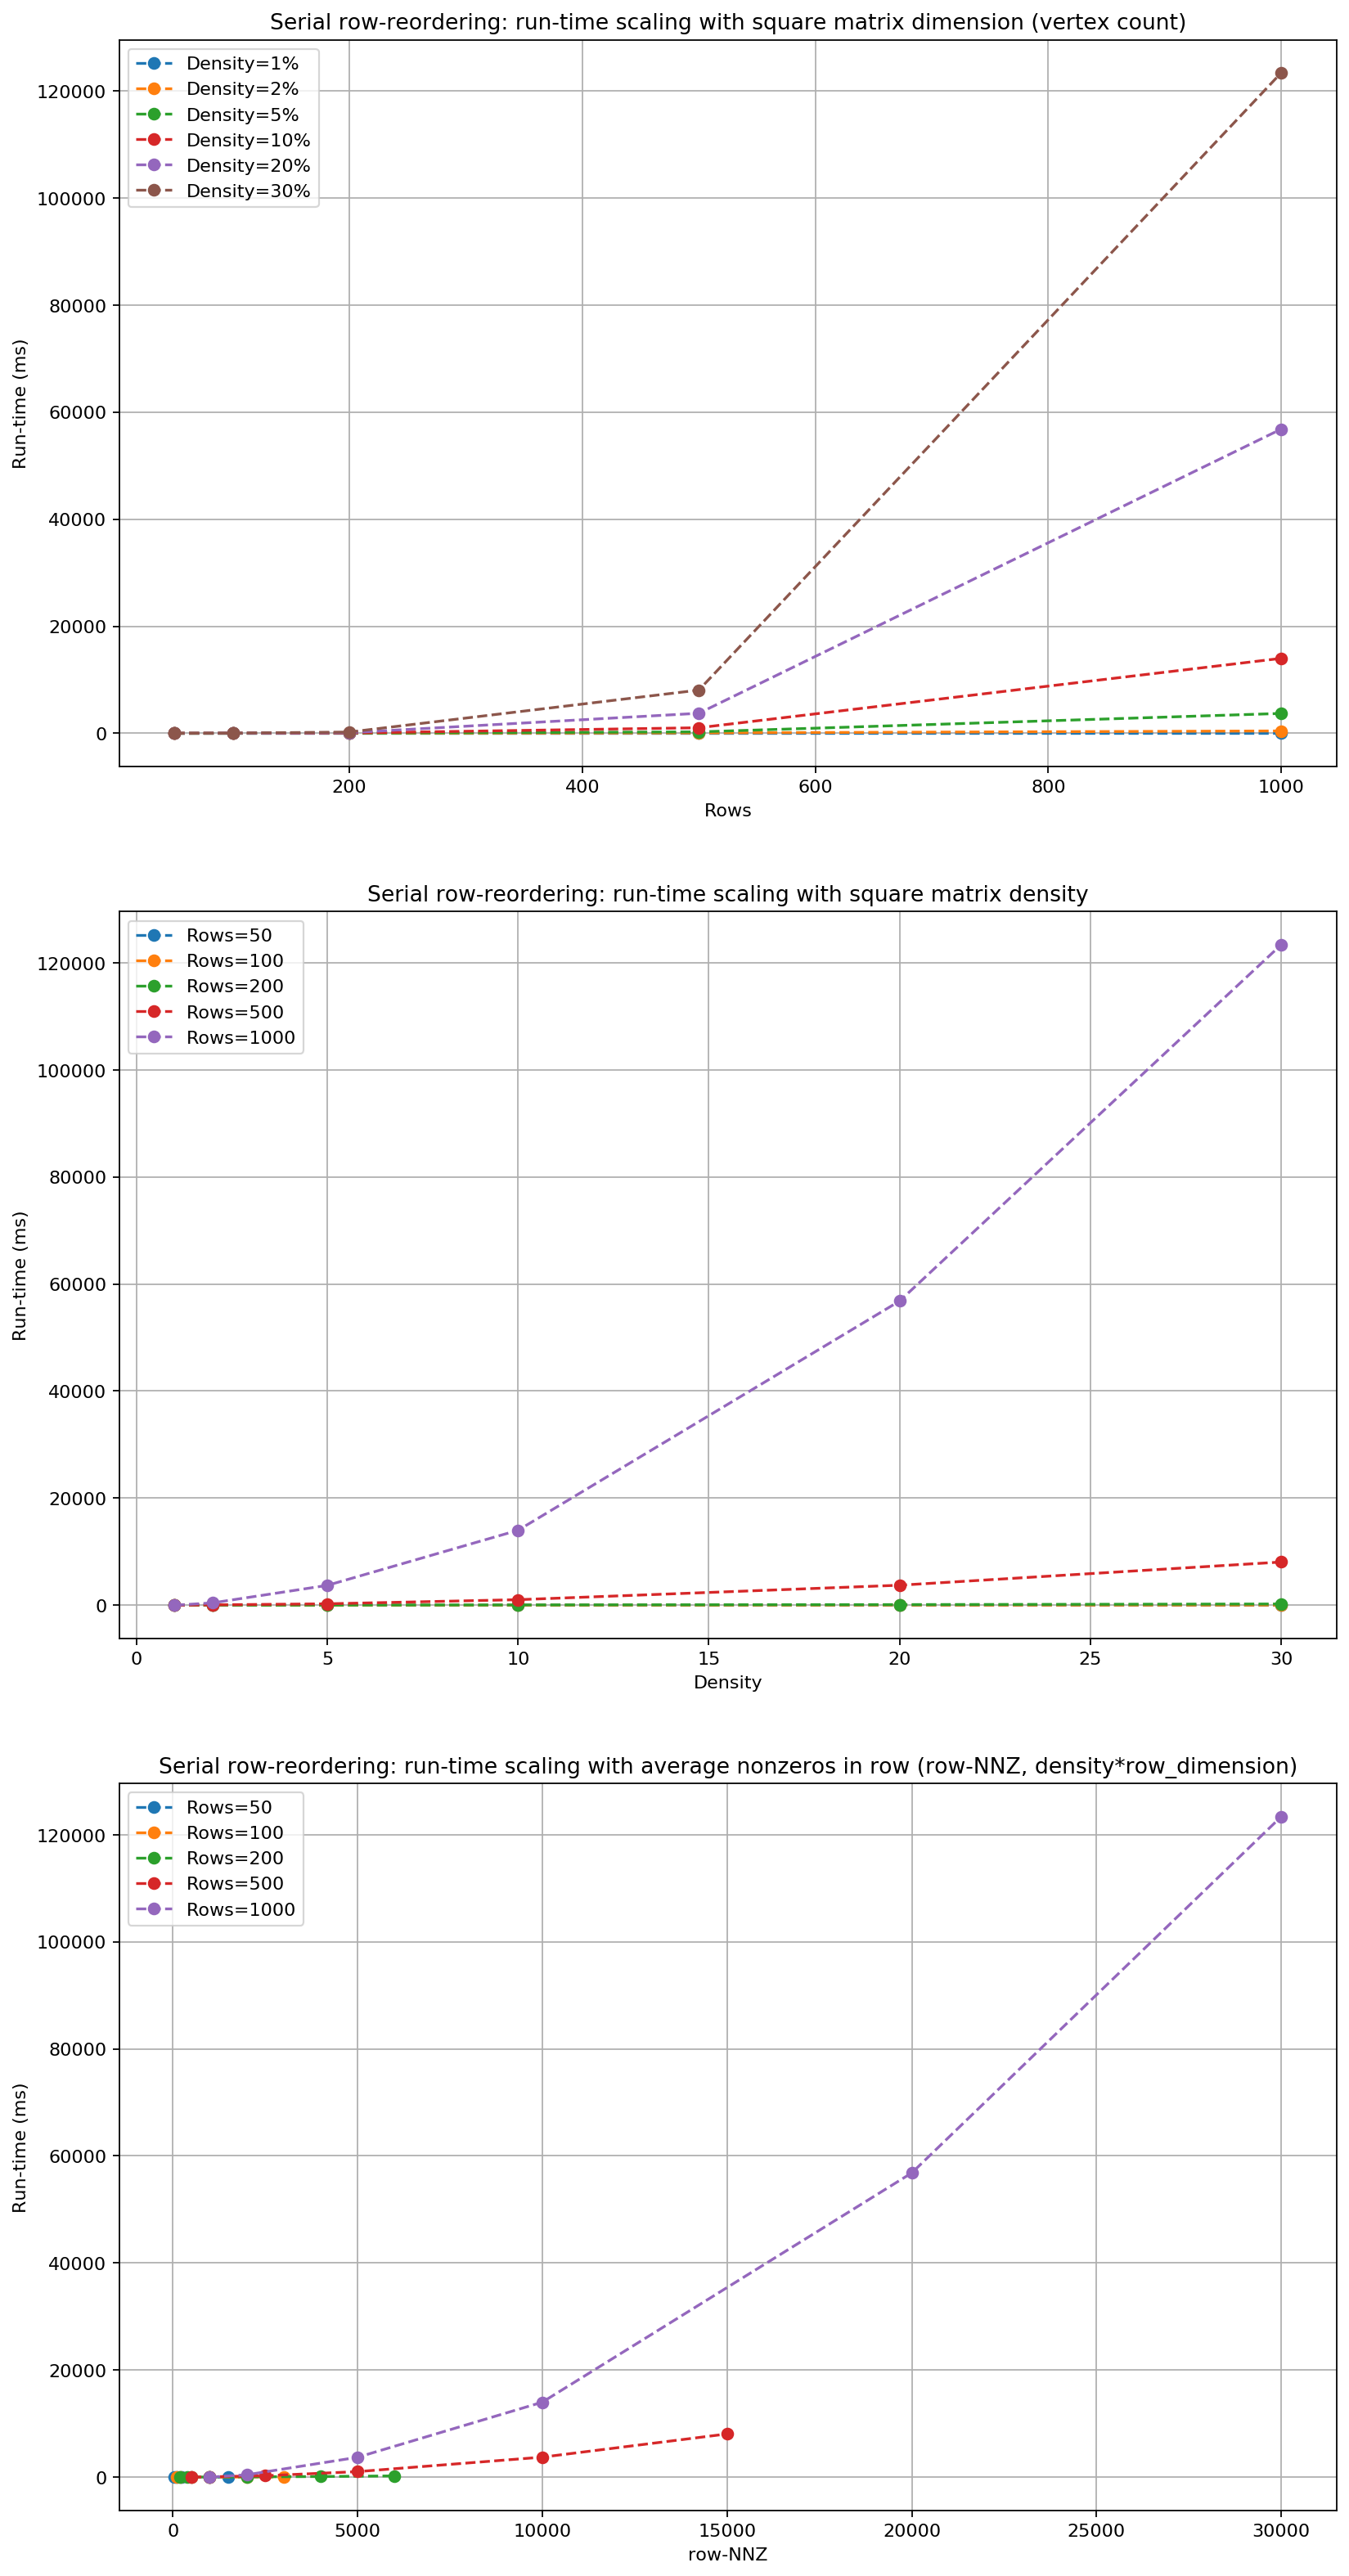

In [50]:
plt.figure(figsize=(12, 25), dpi=160)
plt.subplot(311)
for ddx in range(num_dens_vals):
    plt.plot(result_metadata_row[ddx,:],result_time[ddx,:],'--o')
plt.grid(True)
plt.xlabel('Rows')
plt.ylabel('Run-time (ms)')
plt.title('Serial row-reordering: run-time scaling with square matrix dimension (vertex count)')
plt.legend(["Density="+str(d)+"%" for d in density_pct_range])

    
plt.subplot(312)
for rdx in range(num_md_rows):
    plt.plot(result_density_pct[:,rdx],result_time[:,rdx],'--o')
plt.grid(True)
plt.xlabel('Density')
plt.ylabel('Run-time (ms)')
plt.title('Serial row-reordering: run-time scaling with square matrix density')
plt.legend(["Rows="+str(r) for r in metadata_row_range])

plt.subplot(313)
for rdx in range(num_md_rows):
    plt.plot(result_density_pct[:,rdx]*metadata_row_range[rdx],result_time[:,rdx],'--o')
plt.grid(True)
plt.xlabel('row-NNZ')
plt.ylabel('Run-time (ms)')
plt.title('Serial row-reordering: run-time scaling with average nonzeros in row (row-NNZ, density*row_dimension)')
plt.legend(["Rows="+str(r) for r in metadata_row_range])